<a href="https://colab.research.google.com/github/johnowusuduah/portfolio/blob/main/logistic_regression_maternal_smoking_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Modeling of Associative Relationship Between Chances of Giving Birth to Premature Babies and Smoking Habits of Mothers in R

## Introduction

Fifty years ago it was not trite knowledge that pregnant women could expose their unborn children to untold harm by smoking. The Child Health and Development Studies carried out a thorough study of babies born at the Kaiser Foundational Hospital in Oakland, California between 1960 and 1967. The smoking habits, along with socioeconomic, biographic and demographic conditions of the respondents were recorded and collated in a data set, which is the source of our statistical analysis. 

We would like to determine if there is association between babies weights and mothers smoking habits We would also like to find out the range for the difference in birth weights for mothers who smoke versus mothers who do not smoke.Thirdly, we would also investigate if race significantly affects the association between smoking and birth weight.And finally, we will explore other interesting associations with birth weight that are note worthy.

## Exploratory Data Analysis (EDA)

We used the modified data called "smoking" and found out that it did not have missing/erroneous values. We combined categorical values of mother's race from "0-5" into one factor variable "0" which stands for mothers belonging to the "white" race. Mothers whose educational level were assigned categorical values "6" and "7" were grouped into one group named "6" and this stands for those whom attended trade school but it is unclear if they graduated from high school. By default, there are only two two levels for the "smoke" variable. "0" means mothers who have never smoked and "1" represents mothers who smoke. We then checked the the distribution of the response variable which is the birth weight of babies in ounces. 

Load necessary packages

In [8]:
library(ggplot2)
library(MASS)
library(dplyr)
#library(rms) #for VIF
library(MASS)

In [3]:
babies <- read.csv("https://raw.githubusercontent.com/johnowusuduah/portfolio/main/smoking.csv", stringsAsFactor = FALSE, header = TRUE)
# convert race and education to factors
babies$mrace[(babies$mrace >= 0) & (babies$mrace <= 5)] <- 0
babies$mrace <- factor(babies$mrace)
babies$med[(babies$med == 7)] <- 6
babies$med <- factor(babies$med)
babies$inc <- factor(babies$inc)
babies$smoke <- factor(babies$smoke)
babies$logbwt.oz <- log(babies$bwt.oz)
head(babies)

,id,date,gestation,bwt.oz,parity,mrace,mage,med,mht,mpregwt,inc,smoke,logbwt.oz
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>
1,4604,1598,148,116,7,7,28,1,66,135,2,0,4.753590
2,7435,1527,181,110,7,7,27,1,64,133,1,0,4.700480
3,7722,1563,204,55,11,7,35,3,65,140,6,0,4.007333
4,2026,1503,225,132,4,7,28,2,67,148,3,0,4.882802
5,3553,1638,233,105,4,7,34,3,61,130,3,0,4.653960
6,3491,1705,234,85,7,7,33,1,67,130,2,0,4.442651


First, we checked for empty or missing values in the data frame and we saw that there were no empty or missing values in the data frame.

In [9]:
colSums(is.na(babies))

id      date gestation    bwt.oz    parity     mrace      mage       med 
        0         0         0         0         0         0         0         0 
      mht   mpregwt       inc     smoke logbwt.oz 
        0         0         0         0         0

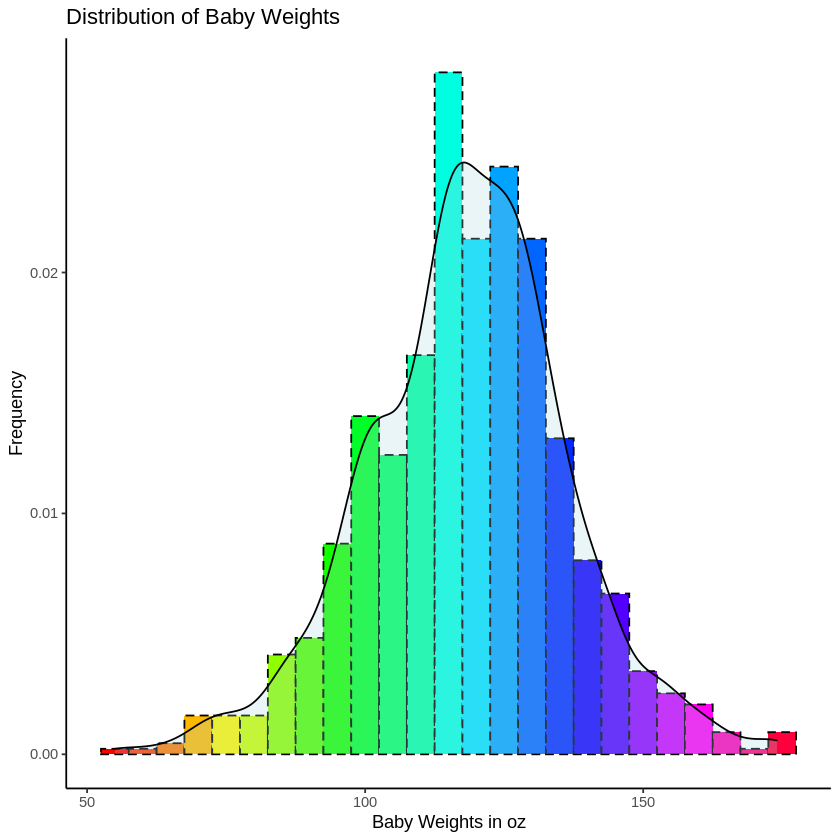

In [10]:
ggplot(data=babies, aes(x=bwt.oz)) + geom_histogram(aes(y=..density..), color="black", linetype="dashed", binwidth=5, fill=rainbow(25)) + geom_density(alpha=.25, fill="lightblue") + scale_fill_brewer(palette="Blues") + labs(title="Distribution of Baby Weights", y="Frequency", x="Baby Weights in oz") + theme_classic() + theme(legend.position="none")

The distribution of the weight of babies appears to follow a normal distribution. We could not find justification for transforming the response variable at this stage because of how normal the distribution of baby weights was. To get an intuitive understanding of the relationship between the weight of babies and other potential predictor variables, which we selected after acquiring some domain knowledge. We plotted scatter plots for continuous/discrete variables and box plots for categorical variables. We first checked the relationship between the weight of babies and smoke predictor variable.